In [1]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_curve, plot_roc_curve, auc, roc_auc_score, classification_report, confusion_matrix, plot_confusion_matrix
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import utils
import preprocessing

### Preprocessing base

In [3]:
df = utils.get_data()

In [2]:
params = { 'max_depth': range(1,8), 'loss': ('deviance', 'exponential'), 'max_features': ('sqrt', 'log2'), 'learning_rate': [0.005, 0.01, 0.05, 0.075, 0.1, 0.25, 0.5] }
model = GradientBoostingClassifier()

In [4]:
gscv = GridSearchCV(model, params, scoring='roc_auc', n_jobs=-1, verbose=5)

In [5]:
X = df.drop('tiene_alto_valor_adquisitivo',1)
Y = df['tiene_alto_valor_adquisitivo']

X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=112)
X_train, X_test = preprocessing.preprocessing_base_parte_1(X_train, X_test)

In [6]:
%%time
gscv.fit(X_train, y_train)
score = roc_auc_score(y_test, gscv.predict_proba(X_test)[:,1])

Fitting 5 folds for each of 196 candidates, totalling 980 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    8.8s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   55.8s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  6.7min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed: 10.2min
[Parallel(n_jobs=-1)]: Done 874 tasks      | elapsed: 14.3min
[Parallel(n_jobs=-1)]: Done 980 out of 980 | elapsed: 16.3min finished


CPU times: user 7.94 s, sys: 668 ms, total: 8.61 s
Wall time: 16min 21s


In [7]:
gscv.best_params_

{'learning_rate': 0.5,
 'loss': 'deviance',
 'max_depth': 3,
 'max_features': 'log2'}

In [8]:
score

0.9150712792445721

In [9]:
print(classification_report(y_test,gscv.predict(X_test)))

              precision    recall  f1-score   support

           0       0.87      0.95      0.91      6182
           1       0.78      0.57      0.66      1959

    accuracy                           0.86      8141
   macro avg       0.83      0.76      0.78      8141
weighted avg       0.85      0.86      0.85      8141



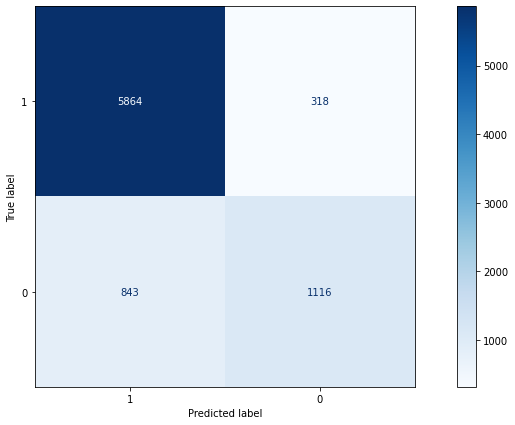

In [10]:
fig, ax = plt.subplots(figsize=(15,7))
plt.grid(False)
plot_confusion_matrix(gscv, X_test, y_test, cmap=plt.cm.Blues, display_labels=['1', '0'], ax=ax)
plt.show()

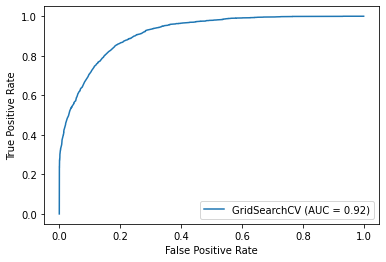

In [11]:
plot_roc_curve(gscv, X_test, y_test)

### Preprocessing Significantes

In [12]:
df = utils.get_data()

In [13]:
params = { 'max_depth': range(1,8), 'loss': ('deviance', 'exponential'), 'max_features': ('sqrt', 'log2'), 'learning_rate': [0.005, 0.01, 0.05, 0.075, 0.1, 0.25, 0.5] }
model = GradientBoostingClassifier()

In [14]:
gscv = GridSearchCV(model, params, scoring='roc_auc', n_jobs=-1, verbose=5)

In [15]:
X = df[df.columns.drop('tiene_alto_valor_adquisitivo')]
Y = df['tiene_alto_valor_adquisitivo']
X = pd.get_dummies(X, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=112)
X_train, X_test = preprocessing.preprocessing_significantes(X_train, X_test, 0.9)

/home/nicolascontinanza/Desktop/FIUBA/Datos/tp-datos-1c2021-de-angelis-riva-continanza/Parte2/preprocessing.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['ganancia_perdida_declarada_bolsa_argentina'] = X_train['ganancia_perdida_declarada_bolsa_argentina'].apply(_log_scale)
/home/nicolascontinanza/Desktop/FIUBA/Datos/tp-datos-1c2021-de-angelis-riva-continanza/Parte2/preprocessing.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['ganancia_perdida_declarada_bolsa_argentina'] = X_test[

In [ ]:
%%time
gscv.fit(X_train, y_train)
score = roc_auc_score(y_test, gscv.predict_proba(X_test)[:,1])

Fitting 5 folds for each of 196 candidates, totalling 980 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   46.7s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed: 14.4min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed: 21.7min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed: 34.0min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed: 47.0min


In [17]:
gscv.best_params_

{'learning_rate': 0.1,
 'loss': 'exponential',
 'max_depth': 5,
 'max_features': 'sqrt'}

In [18]:
score

0.9007162604997401

In [19]:
print(classification_report(y_test,gscv.predict(X_test)))

              precision    recall  f1-score   support

           0       0.88      0.92      0.90      6182
           1       0.71      0.59      0.64      1959

    accuracy                           0.84      8141
   macro avg       0.79      0.75      0.77      8141
weighted avg       0.84      0.84      0.84      8141



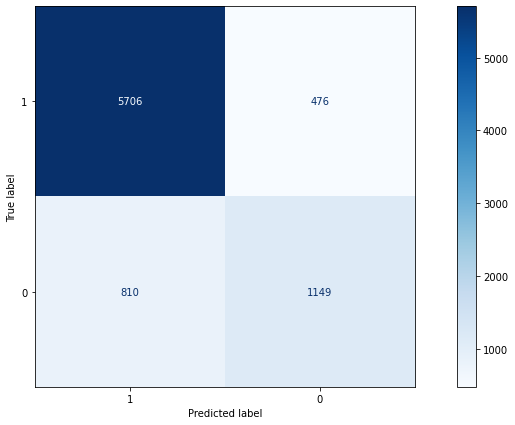

In [20]:
fig, ax = plt.subplots(figsize=(15,7))
plt.grid(False)
plot_confusion_matrix(gscv, X_test, y_test, cmap=plt.cm.Blues, display_labels=['1', '0'], ax=ax)
plt.show()

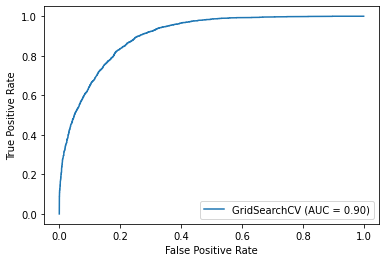

In [21]:
plot_roc_curve(gscv, X_test, y_test)